In [8]:
import numpy as np
import matplotlib.pyplot as plt
from Laser.abcd import Beampath
%matplotlib inline

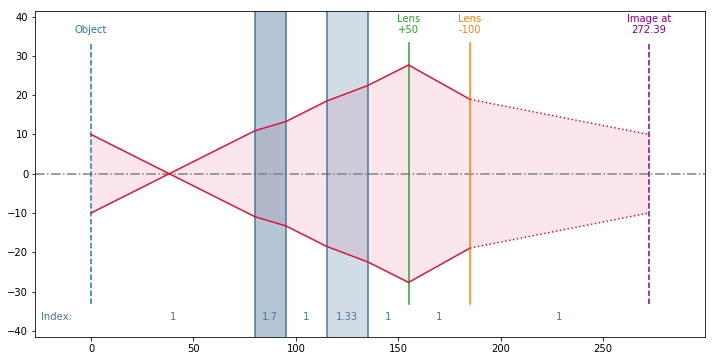

In [9]:
# Initialise input
bp = Beampath(10, np.deg2rad(-15))

# Add elements
bp.add_freespace(80)
bp.add_interface(1.7)
bp.add_freespace(15)
bp.add_interface(1)
bp.add_freespace(20)

#bp.add_interface(1.33)
#bp.add_freespace(20)
#bp.add_interface(1)
bp.add_thicklens(1.33, 20) # a thick lens is the same as interface > propagation > interface

bp.add_freespace(20)
bp.add_thinlens(50)
bp.add_freespace(30)
bp.add_thinlens(-100)

# Calculate image position 
bp.add_image()

# Display the beam path
bp.plot()

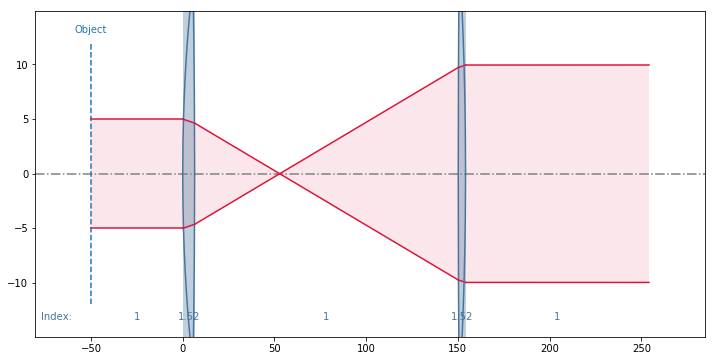

In [10]:
# Telescope built from Thorlabs LBF254-050-A and Thorlabs LBF254-100-A

bp2 = Beampath(radius=5, angle=0, index=1, position=-50) # all 4 input parameters
bp2.add_freespace(50)
bp2.add_thicklens(1.5168, 6.5, 30.06, -172.0)
bp2.add_freespace(46.4+97.3)
bp2.add_thicklens(1.5168, 4, 353.3, -60.03)
bp2.add_freespace(100)
bp2.plot()

Radius:  [  0.          10.          10.          11.58415842  11.58415842
  12.70415842  12.70415842   0.           0.        ] 

Angle:  [ 0.25        0.25        0.07920792  0.07920792  0.112       0.112       0.112
  0.112       0.112     ] 

Index:  [ 1.     1.     1.414  1.414  1.     1.     1.     1.     1.   ] 

Position:  [  0.          40.          40.          60.          60.          70.          70.
 -43.42998586 -43.42998586] 

ABCD matrix:  [[ 2.23214286  0.        ]
 [-0.0138      0.448     ]]


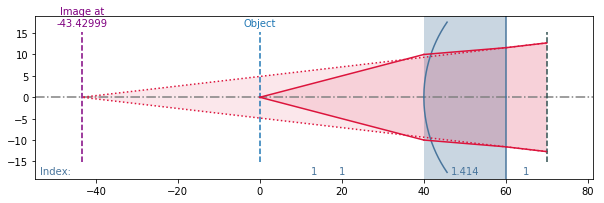

In [11]:
bp3 = Beampath(0,0.25)
bp3.add_freespace(40)
bp3.add_thicklens(1.414, 20, radius_in=30)
bp3.add_freespace(10)
bp3.add_image()

# "plot_digit" keyword argument to change the number
# of displayed decimals (trailing zeros are trimmed)
# "figsize" to change the figure size (expect a tuple, default is (12,6))
bp3.plot(plot_digit=5, figsize=(10,3))

# Access to the beam parameter along the path, and the total ABCD matrix
print('Radius: ', bp3.radius, '\n')
print('Angle: ', bp3.angle, '\n')
print('Index: ', bp3.index, '\n')
print('Position: ', bp3.position, '\n')
print('ABCD matrix: ', bp3.M)

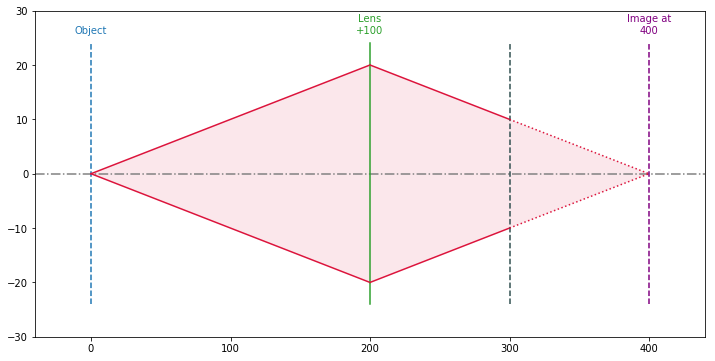

In [12]:
bp4 = Beampath(0, 0.1) # point source by default
bp4.add_freespace(200)
bp4.add_thinlens(100) # image at infinity (object in focal plane of lens)
bp4.add_freespace(100) # Add a dummy exit plane (grey dashes)
bp4.add_image()
bp4.plot()